In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Gathering the data

In [2]:
df_2022 = pd.read_csv('Data/survey_results_public_2022.csv')
df_2022.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


# What are the most popular technologies in 2022?

### Assessing the data

In [3]:
df_2022.LanguageHaveWorkedWith.value_counts()

HTML/CSS;JavaScript;TypeScript                                                              1250
Python                                                                                       962
HTML/CSS;JavaScript                                                                          914
HTML/CSS;JavaScript;PHP;SQL                                                                  745
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                        570
                                                                                            ... 
C#;Java;JavaScript;PHP;PowerShell;SQL;TypeScript                                               1
C++;HTML/CSS;JavaScript;Python;Solidity;SQL                                                    1
Dart;Haskell;HTML/CSS;Java;R;SQL;TypeScript                                                    1
Bash/Shell;C;C#;Go;HTML/CSS;Java;JavaScript;Lua;Perl;PHP;Python;Ruby;Rust;SQL;TypeScript       1
C#;JavaScript;Lua;PowerShell;S

Observation is data is written to a single field and different programming languages are separated with comma

### Cleaning the Data

We should implement a function to separate and count the programming languages.
The following function split the string in each cell and count different programming languages separately and then divide the counts over the number of rows in our column. 

In [4]:
def clean_and_count(col):
    length = col.shape[0]
    col = col.str.split(';')
    col = col.explode()
    counts = col.value_counts()/length
    return counts

using our implemented function to know which programming language is mentioned more frequent as an answer

In [5]:
Worked_with_popularity  = clean_and_count(df_2022.LanguageHaveWorkedWith)
print(Worked_with_popularity)

JavaScript     0.633878
HTML/CSS       0.534230
SQL            0.479432
Python         0.466165
TypeScript     0.337828
Java           0.322706
Bash/Shell     0.281924
C#             0.271374
C++            0.218704
PHP            0.202367
C              0.186876
PowerShell     0.117036
Go             0.108124
Rust           0.090421
Kotlin         0.088811
Dart           0.063438
Ruby           0.058675
Assembly       0.053052
Swift          0.047620
R              0.045149
VBA            0.043471
MATLAB         0.039758
Lua            0.039130
Groovy         0.032170
Delphi         0.031542
Scala          0.025072
Objective-C    0.023175
Perl           0.022438
Haskell        0.021524
Elixir         0.020855
Julia          0.014795
Clojure        0.014604
Solidity       0.014072
LISP           0.012720
F#             0.009963
Fortran        0.008817
Erlang         0.008749
APL            0.006879
COBOL          0.006333
SAS            0.005937
OCaml          0.005760
Crystal        0

In [6]:
df = pd.DataFrame({'Language':Worked_with_popularity.index, 'popularity':Worked_with_popularity.values})


### Analyzing the Data

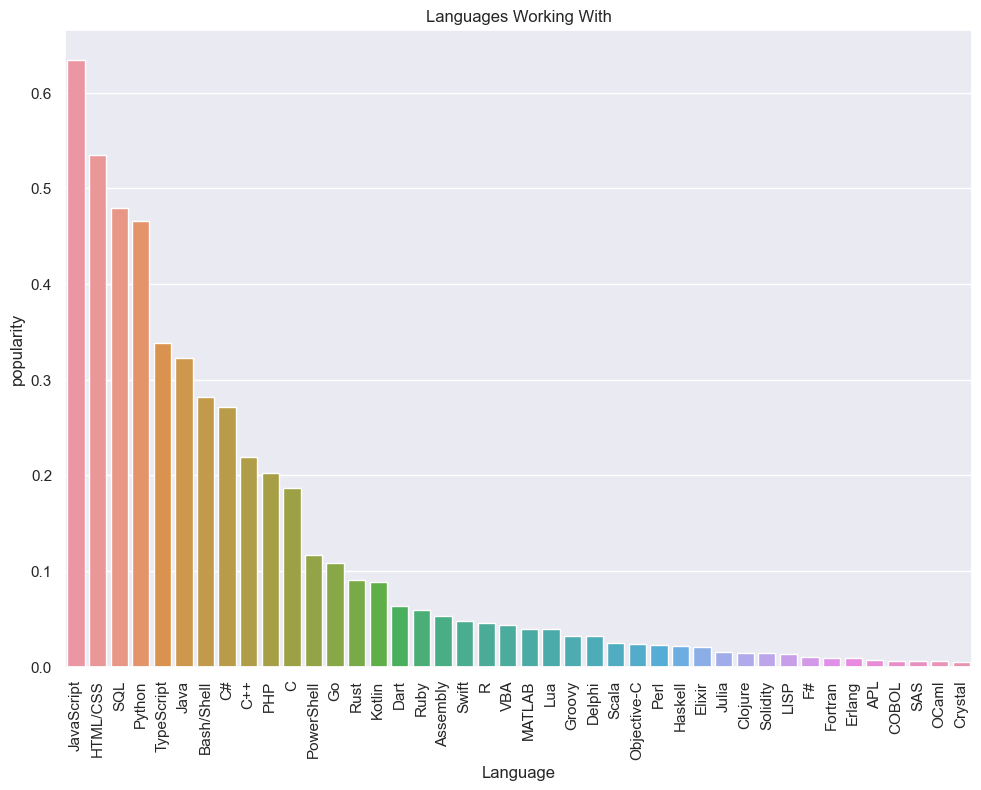

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=df, x="Language", y="popularity").set(title='Languages Working With');
plt.xticks(rotation=90);


From the previous graph, we can see that Java Script is the most used programming lanuaga by HTML and CSS, Then SQL and Python. We can see that more than 60% of the survey takers responded that they are using the Java Script in the last year. While for example only around 20% used C++ in their work activities in the last year. 

In [8]:
want_to_work_with  = clean_and_count(df_2022.LanguageWantToWorkWith)
print(want_to_work_with)

JavaScript     0.430625
Python         0.400584
TypeScript     0.355544
HTML/CSS       0.346986
SQL            0.338538
Rust           0.233567
C#             0.214022
Go             0.211552
Java           0.182140
Bash/Shell     0.180734
C++            0.162363
Kotlin         0.127150
C              0.107223
PHP            0.099975
Dart           0.083024
Swift          0.069212
PowerShell     0.064148
Ruby           0.053325
Elixir         0.044890
Assembly       0.041573
Haskell        0.040413
R              0.040045
Solidity       0.035568
Scala          0.033453
Lua            0.032620
Julia          0.030313
F#             0.026574
Clojure        0.026451
Delphi         0.022697
LISP           0.016924
Erlang         0.016706
MATLAB         0.014454
Groovy         0.014154
Perl           0.012748
VBA            0.012598
Objective-C    0.011970
OCaml          0.010086
APL            0.008298
Crystal        0.006961
Fortran        0.005992
SAS            0.005159
COBOL          0

From the following graph, we can see that the Java Script is also the most desired language to learn, followed by the python. 

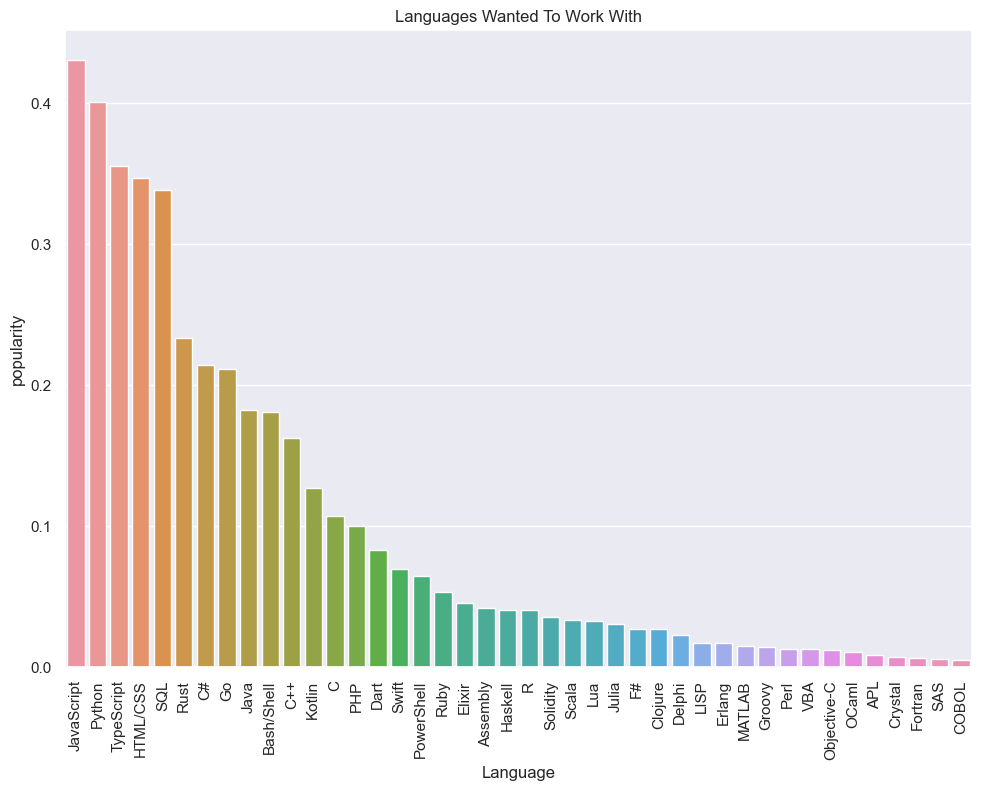

In [9]:
df = pd.DataFrame({'Language':want_to_work_with.index, 'popularity':want_to_work_with.values})
sns.barplot(data=df, x="Language", y="popularity").set(title='Languages Wanted To Work With');
plt.xticks(rotation=90);


# Relation Between Language and The Salary:

In the following code, we are trying to find the relation between certain programming language and Developers salaries.

In [10]:
df_2022.groupby(['LanguageHaveWorkedWith']).mean()["ConvertedCompYearly"].sort_values()

C:\Users\q611064\AppData\Local\Temp\ipykernel_23304\2315435854.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_2022.groupby(['LanguageHaveWorkedWith']).mean()["ConvertedCompYearly"].sort_values()


LanguageHaveWorkedWith
Assembly;C#;HTML/CSS;JavaScript;MATLAB;PowerShell;SQL;TypeScript                1.0
Java;PowerShell;Python;SQL;TypeScript                                           1.0
Clojure;HTML/CSS;JavaScript;Rust;TypeScript                                     4.0
C;C++;Haskell;HTML/CSS;Java;JavaScript;Python;Ruby;Rust;Scala;TypeScript;VBA    4.0
C;Go;HTML/CSS;Java;JavaScript;Python;VBA                                        5.0
                                                                               ... 
Rust;VBA                                                                        NaN
SQL;TypeScript;VBA                                                              NaN
Solidity;Swift                                                                  NaN
Swift;TypeScript;VBA                                                            NaN
TypeScript;VBA                                                                  NaN
Name: ConvertedCompYearly, Length: 25068, dtype: floa

We can see that some of the data have a NaN value. So let's remove the rows with the NaN values in the salary.

In [11]:
test = df_2022.dropna(axis=0, how="any" , subset=["ConvertedCompYearly"])

Separating Languages again after removing the Nan Values.

In [12]:
test['LanguageHaveWorkedWith'] = test['LanguageHaveWorkedWith'].str.split(';')
test = test.explode('LanguageHaveWorkedWith')


C:\Users\q611064\AppData\Local\Temp\ipykernel_23304\2362959522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LanguageHaveWorkedWith'] = test['LanguageHaveWorkedWith'].str.split(';')


In [13]:
language_salaries_mean = test.groupby('LanguageHaveWorkedWith')['ConvertedCompYearly'].mean().sort_values()
print(language_salaries_mean)

LanguageHaveWorkedWith
Dart           110516.123177
PHP            132959.500201
HTML/CSS       154536.244575
JavaScript     168470.534020
Java           170724.391688
SQL            174652.808734
C#             175871.259149
TypeScript     178835.787027
Kotlin         181337.808087
C              186850.367081
C++            188455.381080
Python         190756.532908
Clojure        193153.295154
MATLAB         194027.543792
Elixir         195308.753769
Swift          197010.570452
PowerShell     205479.920754
Delphi         209874.267873
Bash/Shell     212303.790061
R              217643.571429
Ruby           219172.687018
Assembly       228464.461730
Go             238710.013357
VBA            241912.273002
Rust           250118.728869
Lua            258083.944248
Groovy         274960.535202
Solidity       275098.143508
Scala          277851.586784
Objective-C    280542.676768
Perl           298002.989933
Haskell        326575.803774
Julia          339142.223005
Erlang         35884

In [16]:
one_hot_encoded = pd.get_dummies(test['LanguageHaveWorkedWith'])
df_encoded = pd.concat([test, one_hot_encoded], axis=1)


In [17]:
df_combined = df_encoded.groupby('ResponseId').max().reset_index()


In [18]:
df_2022[["ResponseId","LanguageHaveWorkedWith", "ConvertedCompYearly"]].head()

,ResponseId,LanguageHaveWorkedWith,ConvertedCompYearly
0,1,NaN,NaN
1,2,JavaScript;TypeScript,NaN
2,3,C#;C++;HTML/CSS;JavaScript;Python,40205.0
3,4,C#;JavaScript;SQL;TypeScript,215232.0
4,5,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,NaN


In [19]:
one_hot_encoded_columns = list(one_hot_encoded.columns)
print(one_hot_encoded_columns)

['APL', 'Assembly', 'Bash/Shell', 'C', 'C#', 'C++', 'COBOL', 'Clojure', 'Crystal', 'Dart', 'Delphi', 'Elixir', 'Erlang', 'F#', 'Fortran', 'Go', 'Groovy', 'HTML/CSS', 'Haskell', 'Java', 'JavaScript', 'Julia', 'Kotlin', 'LISP', 'Lua', 'MATLAB', 'OCaml', 'Objective-C', 'PHP', 'Perl', 'PowerShell', 'Python', 'R', 'Ruby', 'Rust', 'SAS', 'SQL', 'Scala', 'Solidity', 'Swift', 'TypeScript', 'VBA']


In [20]:
one_hot_encoded_columns.append("ConvertedCompYearly")

In [21]:
df_combined[one_hot_encoded_columns]

,APL,Assembly,Bash/Shell,C,C#,C++,COBOL,Clojure,Crystal,Dart,...,Ruby,Rust,SAS,SQL,Scala,Solidity,Swift,TypeScript,VBA,ConvertedCompYearly
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40205.0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,215232.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,49056.0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,60307.0
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,194400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38066,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,115000.0
38067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,57720.0
38068,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,70000.0
38069,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,35192.0


In [22]:
popular_lang = clean_and_count(df_2022.LanguageWantToWorkWith).head(10).to_frame()
correlation_indexes = list(popular_lang.index)
# correlation_indexes.append("ConvertedCompYearly")

### Data Modeling

Now we need to see the correlation between working with different languages

In [23]:
correlation = df_combined[correlation_indexes].corr()

### Data Visualization

<AxesSubplot:>

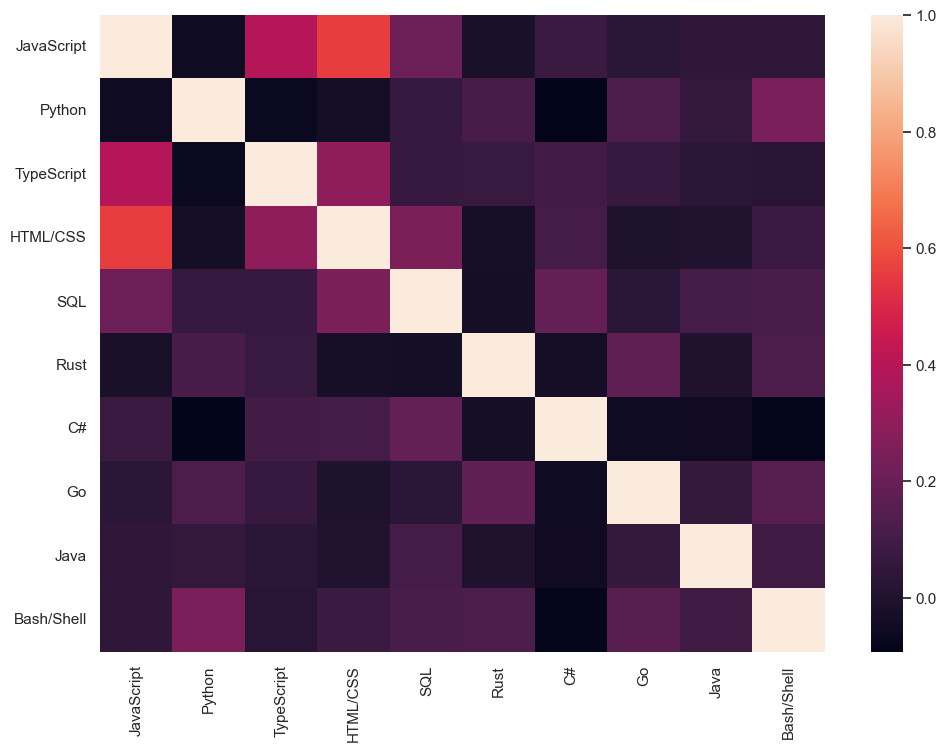

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation)


In [25]:
all_popular_lang = clean_and_count(df_2022.LanguageWantToWorkWith).to_frame()
correlation_indexes = list(all_popular_lang.index)
all_correlation = df_combined[correlation_indexes].corr()

<AxesSubplot:>

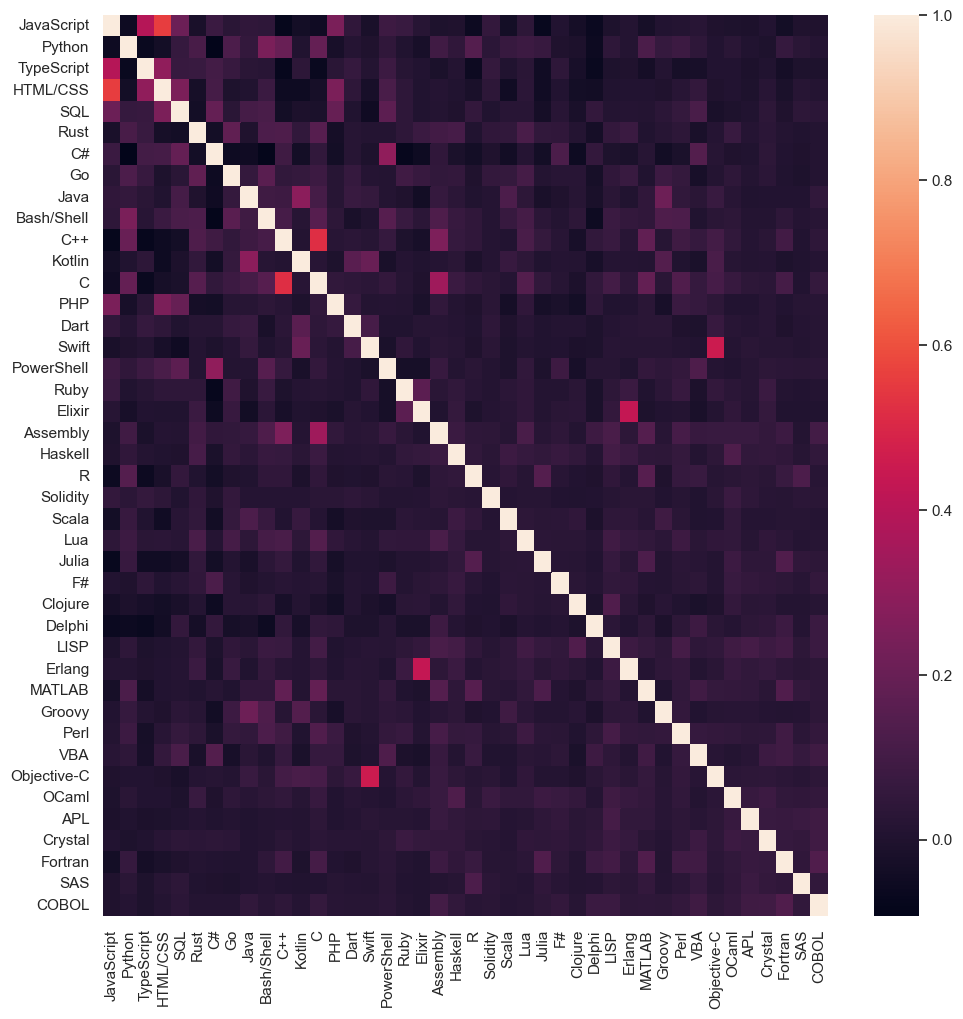

In [26]:
sns.set(rc={'figure.figsize':(11.7,11.7)})

sns.heatmap(all_correlation)

Finding the correlation between working with a language and the salary

In [27]:
correlation = df_combined[one_hot_encoded_columns].corr()

In [29]:
correlation["ConvertedCompYearly"].to_frame().sort_values('ConvertedCompYearly').style.bar(subset=["ConvertedCompYearly"], align='mid', color=['#d65f5f', '#5fba7d'])

,ConvertedCompYearly
PHP,-0.023912
HTML/CSS,-0.022112
Dart,-0.018102
JavaScript,-0.004089
Java,-0.000031
Clojure,0.003867
C#,0.004201
Kotlin,0.004248
MATLAB,0.004987
Elixir,0.005146
